# Домашняя работа "Деревья решений"

Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

# Решение

In [1]:
import pandas
import seaborn
from matplotlib import pyplot

In [2]:
random_state = 42

### Получение данных

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

def get_boston_data():
    load_boston_data = load_boston()
    
    print(load_boston_data['DESCR'])
    return pandas.read_csv(load_boston_data['filename'], skiprows=1)

x_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
y_column = 'MEDV'
boston_data = get_boston_data()

X_train, X_test, y_train, y_test = train_test_split(
    boston_data[x_columns], 
    boston_data[y_column], 
    test_size=0.3, 
    random_state=random_state)  

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Построение модели регрессии

In [5]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
linearRegression.score(X_test, y_test)

0.7112260057484874

### Построение модели дерева

In [6]:
from sklearn.tree import DecisionTreeRegressor

decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(X_train, y_train)
decisionTreeRegressor.score(X_test, y_test)

0.7451931472753259

### Оптимизация параметров

In [7]:
def trimm_data(data, column_name, min_quantile=None, max_quantile=None):
    if min_quantile is None and max_quantile is None:
        return data
    
    elif max_quantile is None:
        return data.loc[data[column_name] >= data[column_name].quantile(min_quantile)]
    
    elif min_quantile is None:
        return data.loc[data[column_name] <= data[column_name].quantile(max_quantile)]

    return data.loc[
        (data[column_name] > data[column_name].quantile(min_quantile))
        & (data[column_name] < data[column_name].quantile(max_quantile))
    ]

optimizing_boston_data = boston_data.copy()

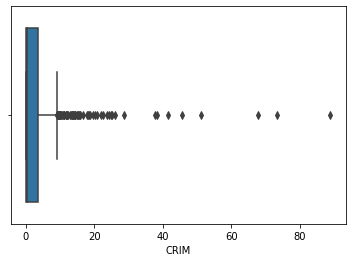

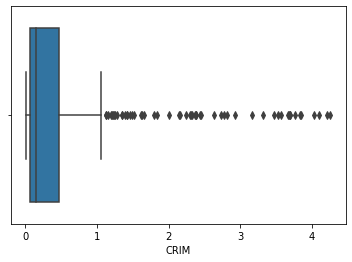

In [8]:
seaborn.boxplot(x=optimizing_boston_data['CRIM'])
pyplot.show()

optimizing_boston_data = trimm_data(optimizing_boston_data, 'CRIM', max_quantile=0.77)

seaborn.boxplot(x=optimizing_boston_data['CRIM'])
pyplot.show()

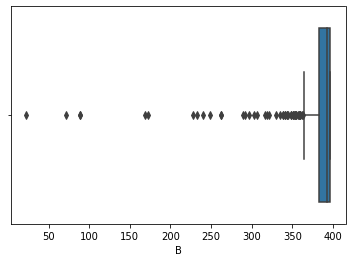

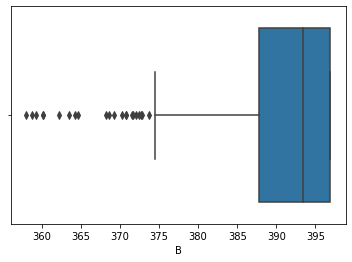

In [9]:
seaborn.boxplot(x=optimizing_boston_data['B'])
pyplot.show()

optimizing_boston_data = trimm_data(optimizing_boston_data, 'B', min_quantile=0.1)
seaborn.boxplot(x=optimizing_boston_data['B'])
pyplot.show()

In [10]:
X_optimizing_train, X_optimizing_test, y_optimizing_train, y_optimizing_test = train_test_split(
    optimizing_boston_data[x_columns], 
    optimizing_boston_data[y_column], 
    test_size=0.3, 
    random_state=random_state)  

In [11]:
linearRegression = LinearRegression()
linearRegression.fit(X_optimizing_train, y_optimizing_train)
linearRegression.score(X_optimizing_test, y_optimizing_test)

0.8796223399599662

In [12]:
decisionTreeRegressor = DecisionTreeRegressor()
decisionTreeRegressor.fit(X_optimizing_train, y_optimizing_train)
decisionTreeRegressor.score(X_optimizing_test, y_optimizing_test)

0.7820364620554832

### Результат

При изменении параметра random_state, показатели у линейной регрессии и дерево решений разные. Линейная регрессия всегда улучшала показатели, после оптимизации, а дерево решений как улучшала так и ухудшала свои показатели.